Graphviz not available, falling back to spring layout


/tmp/ipykernel_2836212/362542810.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


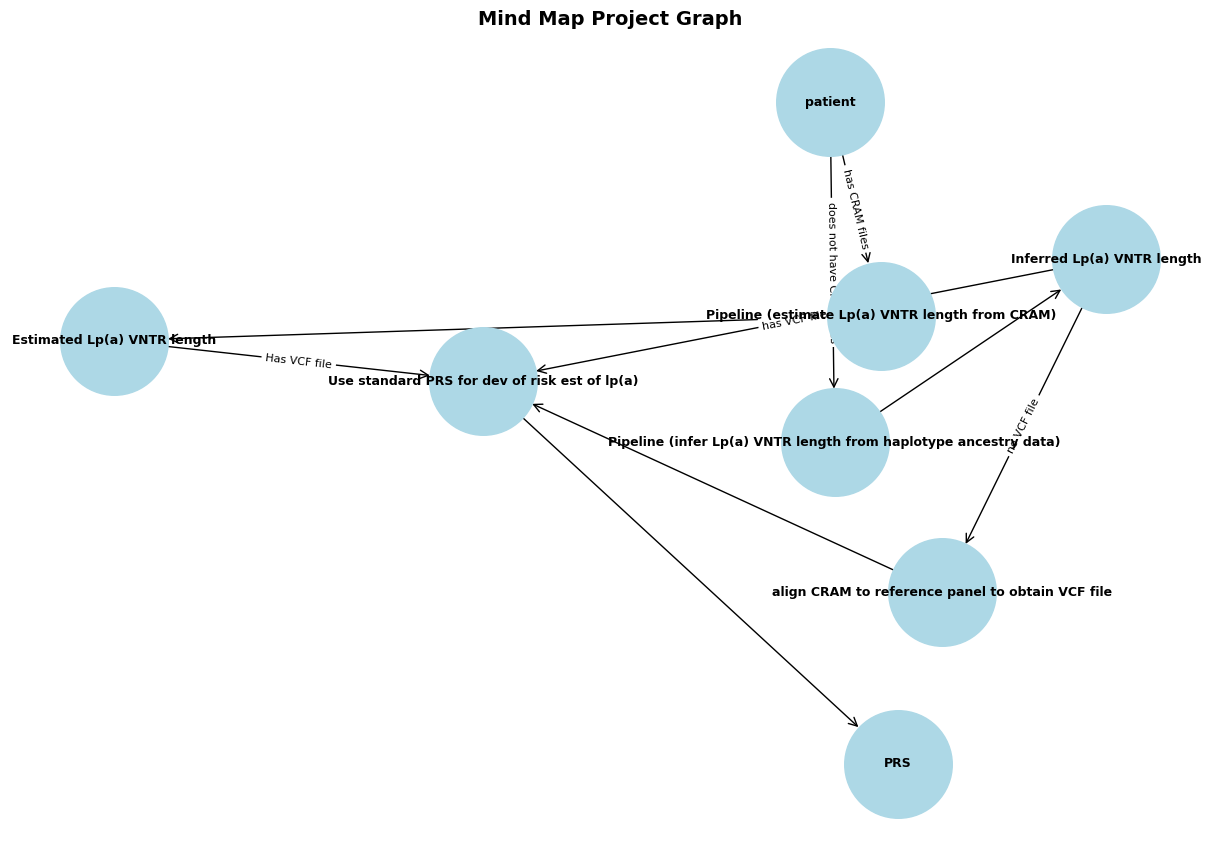

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define graph
G = nx.DiGraph()

# Add nodes with text labels
node_labels = {
    1: "patient",
    2: "Pipeline (estimate Lp(a) VNTR length from CRAM)",
    3: "Pipeline (infer Lp(a) VNTR length from haplotype ancestry data)",
    4: "Estimated Lp(a) VNTR length",
    5: "Inferred Lp(a) VNTR length",
    6: "Use standard PRS for dev of risk est of lp(a)",
    7: "align CRAM to reference panel to obtain VCF file",
    8: "PRS"
}

for node, text in node_labels.items():
    G.add_node(node, label=text)

# Add edges with optional labels
edges = [
    (1, 2, "has CRAM files"),
    (1, 3, "does not have CRAM files"),
    (2, 4, ""),
    (3, 5, ""),
    (4, 6, "Has VCF file"),
    (5, 6, "has VCF file"),
    (5, 7, "no VCF file"),
    (7, 6, ""),
    (6, 8, ""),
]

for u, v, text in edges:
    G.add_edge(u, v, label=text)

# Try hierarchical (flowchart) layout with graphviz

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # top-to-bottom
# except Exception as e:
#     print("Graphviz not available, falling back to spring layout")
#     pos = nx.spring_layout(G, seed=42, k=1.2)

# Draw nodes and edges
plt.figure(figsize=(12, 8))
nx.draw(G, pos,
        with_labels=False,
        node_size=6000,
        node_color="lightblue",
        arrows=True,
        arrowstyle="->",
        arrowsize=15)

# Add node labels
node_texts = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=node_texts, font_size=9, font_weight="bold")

# Add edge labels
edge_texts = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_texts, font_size=8)

plt.title("Mind Map Project Graph", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()
